In [1]:
#Import the necessary Libraries
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

### Transportation Connections

#### 1. Preliminary look at Boston's Data

In [2]:
# Read in the Boston Data
df_bos = pd.read_csv('./listings_boston.csv')
df_bos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,19,2021-02-26,0.27,1,106
1,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,169,29,115,2019-11-02,0.81,4,40
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.35061,-71.08787,Entire home/apt,96,29,5,2020-12-02,0.08,11,307
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,North End,42.36377,-71.05206,Entire home/apt,96,29,2,2016-05-23,0.03,11,293
4,13247,Back Bay studio apartment,51637,Susan,NaN,Back Bay,42.35164,-71.08752,Entire home/apt,75,91,0,NaN,NaN,2,0


In [3]:
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3146 non-null   int64  
 1   name                            3146 non-null   object 
 2   host_id                         3146 non-null   int64  
 3   host_name                       3068 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3146 non-null   object 
 6   latitude                        3146 non-null   float64
 7   longitude                       3146 non-null   float64
 8   room_type                       3146 non-null   object 
 9   price                           3146 non-null   int64  
 10  minimum_nights                  3146 non-null   int64  
 11  number_of_reviews               3146 non-null   int64  
 12  last_review                     21

In [4]:
names_bos = df_bos.name.value_counts()

names_bos.head(60)

Live + Work + Stay + Easy | Studio in Boston          38
Live + Work + Stay + Easy | 2BR in Boston             32
345 Harrison                                          29
Live + Work + Stay + Easy | 1BR in Boston             29
WB Quarters™ by STRB|Hangout|Priv. Room|Shared BA     12
Quarters™ on DOT STRB - Private Room | Shared Bath    11
A place of your own | 1BR in Boston                   11
100 Pier 4                                            10
Clean apartment home | 1BR in Boston                  10
A place of your own | Studio in Boston                 8
Stay in a place of your own | 1BR in Quincy            5
Luxury 2BR | SoWa Southend | Evonify                   4
Cozy Studio + Train | Theatre District | Evonify       4
Private Room in Jamaica Plain - Huge Backyard!         4
A place of your own | 2BR in Boston                    4
Clean apartment home | 2BR in Boston                   4
DOWNTOWN BOSTON / UMASS BOSTON / PRIVATE BEDROOM       4
Stay in a place of your own | 2

In [5]:
# Duplicate name column to name_lower with text set to lowercase to aid function searches.

df_bos['name_lower'] = df_bos['name'].str.lower()

df_bos[['name','name_lower']].head(3)

,name,name_lower
0,HARBORSIDE-Walk to subway,harborside-walk to subway
1,$99 Special!! Home Away! Condo,$99 special!! home away! condo
2,"Back Bay Apt-blocks to subway, Newbury St, The...","back bay apt-blocks to subway, newbury st, the..."


#### 2. Preliminary look at Seattle's Data

In [6]:
# Read in the Seattle Data
df_sea = pd.read_csv('./listings_seattle.csv')
df_sea.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,349,30,32,2020-02-01,0.21,2,107
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,148,2019-12-27,1.14,7,352
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,3,41,2020-11-26,0.37,2,210
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,3,56,2021-02-19,0.50,2,217
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65479,-122.33652,Entire home/apt,100,4,97,2020-09-28,0.82,2,23


In [7]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4213 non-null   int64  
 1   name                            4213 non-null   object 
 2   host_id                         4213 non-null   int64  
 3   host_name                       4021 non-null   object 
 4   neighbourhood_group             4213 non-null   object 
 5   neighbourhood                   4213 non-null   object 
 6   latitude                        4213 non-null   float64
 7   longitude                       4213 non-null   float64
 8   room_type                       4213 non-null   object 
 9   price                           4213 non-null   int64  
 10  minimum_nights                  4213 non-null   int64  
 11  number_of_reviews               4213 non-null   int64  
 12  last_review                     34

In [8]:
names_sea = df_sea.name.value_counts()

names_sea.head(60)

Live + Work + Stay + Easy | 1BR in Seattle                                22
Well-kept apartment home | 2BR in Seattle                                  8
Incredible apartment home | 1BR in Seattle                                 7
Well-kept apartment home | 1BR in Seattle                                  7
**MONTHLY** New Modern 1BR Apt in SLU - gym + pets                         6
Live + Work + Stay + Easy | Studio in Seattle                              6
Rest easy and live life | Studio in Seattle                                5
A-Greenlake Garden Unit                                                    4
SoBe Third Ave Apartments                                                  4
**MONTHLY** Modern & Stylish Studio Apt in Ballard                         4
Everything you need | 1BR in Seattle                                       4
All-inclusive apartment home | 1BR in Seattle                              4
Downtown Seattle Convention Center Apartments 30 Day stays Two Bedroom     4

In [9]:
# Duplicate name column to name_lower with text set to lowercase to aid function searches.

df_sea['name_lower'] = df_sea['name'].str.lower()

df_sea[['name','name_lower']].head(3)

,name,name_lower
0,Casa Madrona - Urban Oasis 1 block from the park!,casa madrona - urban oasis 1 block from the park!
1,Glorious sun room w/ memory foambed,glorious sun room w/ memory foambed
2,The Adorable Sweet Orange Craftsman,the adorable sweet orange craftsman


### Define Necessary Functions

In [10]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [11]:
# define list of possible transport connections for Boston, and Seattle 
# based on names_bos, names_sea and internet information for Boston Public Transit and Seattle Public Transit

possibles = ["parking", "garage", "train", "subway", "bus", "transit","airport","freepk","amtrak",
             "mbta", "redline", "red line", "greenline", "green line", "ferry",
             "blueline", "blue line", "orangeline", "orange line", "matapan","logan",
             "king county metro","sound transit", "community transit", "kitsap transit", "pierce transit",
             "access transportation", "downtown circulator", "circulator", "streetcar", "link light rail", "light rail"
             "sounders", "monorail","wa ferries", "water taxi", "king county", "seatac", "tacoma"]

def clean_and_plot(df, title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the name_lower column (name column set to lowercase)
        title - string the title of plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of possible transport connections (possibles) related to the name / name_lower columns.
    '''
    access_types = df['name_lower'].value_counts().reset_index()
    access_types.rename(columns={'index': 'access_type', 'name_lower': 'count'}, inplace=True)
    access_types_df = total_count(access_types, 'access_type', 'count', possibles)

    access_types_df.set_index('access_type', inplace=True)
    if plot:
        (access_types_df/access_types_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_access_types_df = access_types_df/access_types_df.sum()
    return props_access_types_df

In [12]:
def search_string(string, search_list):
    return_list = [s for s in search_list if s in string]
    if len(return_list) > 0:
        return 1
    else:
        return 0

### Use Functions to create further quantative information pertaining to accessibility

#### 1. For Boston:

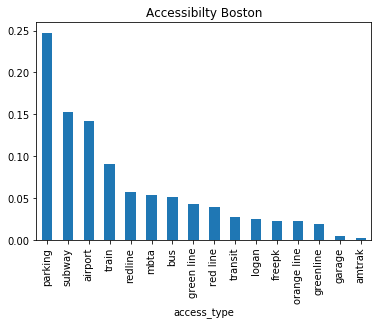

In [13]:
clean_and_plot(df_bos, 'Accessibilty Boston');

In [14]:
# create columns that indicate if the name has a transit connection, is near to the airport or has parking
TransitCheckBoston = ["train", "mbta", "subway", "bus", "transit", "redline", "red line", 
                      "greenline", "green line", "blueline", "blue line", "orangeline", "orange line", "matapan"]
df_bos['transit'] = df_bos.apply(lambda row: search_string(row['name_lower'], TransitCheckBoston), axis=1)

ParkingCheck = ['parking', "freepk", "garage"]
df_bos['parking'] = df_bos.apply(lambda row: search_string(row['name_lower'], ParkingCheck), axis=1)

AirportCheckBoston = ['airport', "logan"]
df_bos['airport'] = df_bos.apply(lambda row: search_string(row['name_lower'], AirportCheckBoston), axis=1)

df_bos[['id', 'name', 'transit', 'parking', 'airport']].head()

,id,name,transit,parking,airport
0,3781,HARBORSIDE-Walk to subway,1,0,0
1,6695,$99 Special!! Home Away! Condo,0,0,0
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",1,0,0
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,1,0,0
4,13247,Back Bay studio apartment,0,0,0


In [15]:
df_bos[['transit', 'parking', 'airport']].describe()

,transit,parking,airport
count,3146.000000,3146.000000,3146.000000
mean,0.083598,0.041640,0.021933
std,0.276828,0.199797,0.146487
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


#### 2. For Seattle

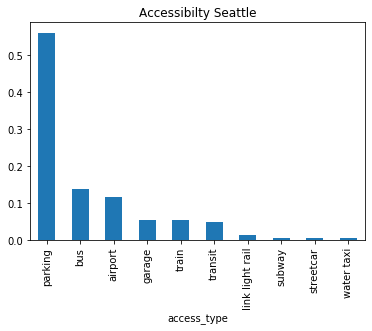

In [16]:
clean_and_plot(df_sea, 'Accessibilty Seattle');

In [17]:
# create columns that indicate if the name has a transit connection, is near to the airport or has parking
TransitCheckSeattle = ["bus", "train", "transit", "link light rail", "subway", "streetcar", "water_taxi"]
df_sea['transit'] = df_sea.apply(lambda row: search_string(row['name_lower'], TransitCheckSeattle), axis=1)

ParkingCheck = ['parking', "garage"]
df_sea['parking'] = df_sea.apply(lambda row: search_string(row['name_lower'], ParkingCheck), axis=1)

AirportCheckSeattle = ['airport']
df_sea['airport'] = df_sea.apply(lambda row: search_string(row['name_lower'], AirportCheckSeattle), axis=1)

df_sea[['id', 'name', 'transit', 'parking', 'airport']].head()

,id,name,transit,parking,airport
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,0,0,0
1,9419,Glorious sun room w/ memory foambed,0,0,0
2,9531,The Adorable Sweet Orange Craftsman,0,0,0
3,9534,The Coolest Tangerine Dream MIL!,0,0,0
4,9596,"the down home , spacious, central and fab!",0,0,0


In [18]:
df_sea[['transit', 'parking', 'airport']].describe()

,transit,parking,airport
count,4213.000000,4213.000000,4213.000000
mean,0.013530,0.032281,0.006171
std,0.115541,0.176766,0.078325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


#### Save new Columns with the Name Column 
* for later use in the Boston and Seattle Analysis Notebooks.

In [19]:
cols = (['id', 'transit', 'parking', 'airport'])
df_bos[cols].to_csv('boston_access.csv', index=False)
df_sea[cols].to_csv('seattle_access.csv', index=False)